In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn  import datasets,metrics,linear_model
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
df=pd.read_csv('creditcard.csv')

In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# set the max columns to none
pd.set_option('display.max_columns', None)

In [5]:
df.shape

(284807, 31)

In [6]:
df.drop('Time',axis=1,inplace=True)

In [7]:
df.shape

(284807, 30)

In [8]:
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.dtypes

V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [10]:
for i in df.columns:
    print(i,df[i].sort_values().unique(),'\n',sep='\n')

V1
[-56.40750963 -46.8550472  -41.92873752 ...   2.44650498   2.45188849
   2.45492999]


V2
[-72.71572756 -63.34469832 -60.46461766 ...  19.16723901  21.46720299
  22.05772899]


V3
[-48.32558936 -33.68098402 -32.96534576 ...   4.1878106    4.22610848
   9.38255843]


V4
[-5.6831712  -5.60060714 -5.56011758 ... 16.49121717 16.71553737
 16.87534403]


V5
[-113.74330671  -42.14789837  -40.4277263  ...   32.9114617    34.09930934
   34.80166588]


V6
[-26.16050594 -23.49671393 -21.92931229 ...  22.52929847  23.91783713
  73.30162555]


V7
[-43.55724157 -41.50679608 -37.06031146 ...  36.87736827  44.05446136
 120.58949395]


V8
[-73.21671846 -50.94336887 -50.68841936 ...  19.16832739  19.58777262
  20.00720837]


V9
[-13.43406632 -13.32015469 -11.12662352 ...  10.37065798  10.39288882
  15.59499461]


V10
[-24.58826244 -24.40318497 -23.22825484 ...  15.24568569  15.33174156
  23.74513612]


V11
[-4.79747346 -4.68293055 -4.56839025 ... 11.61972348 11.66920474
 12.01891318]


V12
[-18.68371

In [11]:
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,9.289524e-16,-1.803266e-15,1.674888e-15,1.475621e-15,3.501098e-15,1.392460e-15,-7.466538e-16,4.258754e-16,9.019919e-16,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [12]:
#Distribution of legit transactions & fraudulent transactions
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

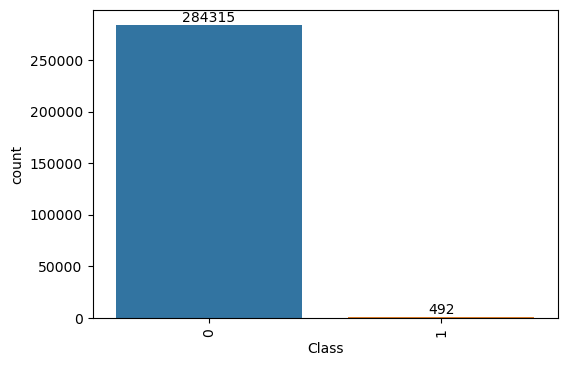

In [13]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x='Class',data = df)
for bars in ax.containers:
    ax.bar_label(bars)
plt.xticks(rotation=90)
plt.show()

In [14]:
#This Dataset is highly unblanced

#0-->Normal Transaction
#1-->Fraudulent Transaction

In [15]:
#Separating the data for analysis
Legit=df[df.Class==0]
Fraud=df[df.Class==1]

In [16]:
print(Legit.shape)
print(Fraud.shape)

(284315, 30)
(492, 30)


In [17]:
#Statistical Measures of the Data
Legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [18]:
Fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [19]:
#Under-Sampling
#Build a sample dataset containing similar distribution of normal transactions and Fraudulent Transactions
#Number of Fraudulent Transactions --> 492

In [20]:
#Compare the values for both transactions
df.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,0.009824,-0.006576,0.010832,0.000189,0.012064,0.000161,0.007164,0.011535,0.003887,-0.001178,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [21]:
Legit_sample=Legit.sample(n=492)

In [22]:
#Concatenating two DataFrames
new_dataset=pd.concat([Legit_sample,Fraud],axis=0)

In [23]:
new_dataset 

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
238559,-0.355149,0.744689,-1.479344,-0.764269,3.904648,3.462056,0.671459,-0.250453,-0.484481,-0.095327,-0.447349,-0.082977,-0.614572,0.487620,-0.600884,-0.878412,-0.409304,-0.532161,-0.373907,-0.311443,0.871653,0.311919,-0.181687,0.699831,-0.178577,-0.620254,0.128274,-0.025609,1.00,0
196280,1.773197,-0.649551,-1.082870,0.441739,-0.258704,-0.427659,-0.041722,-0.145260,1.057347,-0.180102,-0.988201,0.354879,0.045701,0.138956,0.498168,-0.034444,-0.490362,-0.047323,-0.069066,0.068792,0.100395,0.143723,0.070847,0.670067,-0.070829,-0.381621,-0.018413,-0.015120,142.05,0
139235,1.302378,-0.606529,-0.681986,-1.904603,1.326623,3.436312,-1.145127,0.959147,1.671302,-1.022946,-0.191423,0.631027,0.031907,-0.031425,1.446627,-0.121820,-0.651405,0.617970,0.927600,0.005757,-0.064208,-0.080587,-0.072991,1.018136,0.663575,-0.671323,0.096801,0.028697,1.00,0
159166,-4.345713,5.486735,-6.887701,-0.367180,-1.357851,-3.119043,-1.611116,3.458548,-0.259990,-1.654414,-0.695417,0.493305,-0.308783,-1.396804,0.129781,1.728297,4.481775,1.651675,-1.307151,0.024234,0.104158,-0.152494,0.389057,-0.399140,0.485940,0.162090,-0.019525,0.059201,0.87,0
77295,1.253942,-1.589904,1.302473,-1.404359,-2.122419,0.330015,-1.861565,0.313821,-1.433997,1.496018,1.280963,-0.335803,0.227921,-0.471175,0.746634,0.122075,0.261893,0.808450,-0.741181,-0.221974,0.185780,0.810428,-0.034798,0.011426,0.066691,-0.033087,0.082435,0.034540,75.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,2.115795,-5.417424,-1.235123,-6.665177,0.401701,-2.897825,-4.570529,-1.315147,0.391167,1.252967,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,1.794969,-2.775022,-0.418950,-4.057162,-0.712616,-1.603015,-5.035326,-0.507000,0.266272,0.247968,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,1.933520,-5.030465,-1.127455,-6.416628,0.141237,-2.549498,-4.614717,-1.478138,-0.035480,0.306271,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [24]:
new_dataset['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [25]:
new_dataset.groupby('Class').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.019042,-0.066483,0.065524,-0.139789,-0.031853,-0.005208,-0.083320,-0.160520,0.011715,-0.041900,-0.010183,-0.032046,-0.000736,0.020119,-0.014032,-0.004476,0.056924,0.001026,-0.032491,-0.017264,0.057679,-0.048200,0.048654,0.002228,-0.023778,0.033086,0.017000,0.006825,90.100325
1,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,-5.676883,3.800173,-6.259393,-0.109334,-6.971723,-0.092929,-4.139946,-6.665836,-2.246308,0.680659,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [26]:
#Splitting the data into Features & Targets
x=new_dataset.drop(columns='Class',axis=1)
y=new_dataset['Class']

In [27]:
#Split the data into Training data & Testing Data
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=1)
print(x.shape, X_train.shape, X_test.shape)

(984, 29) (688, 29) (296, 29)


In [28]:
models={
    'Logistic Regression':LogisticRegression(random_state=5),
    'Decision Tree':DecisionTreeClassifier(criterion='entropy',random_state=16),
    'Random Forest':RandomForestClassifier(random_state=65)
}

E:\DELL\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression  : 94.59%


              precision    recall  f1-score   support

           0       0.99      0.91      0.95       154
           1       0.91      0.99      0.95       142

    accuracy                           0.95       296
   macro avg       0.95      0.95      0.95       296
weighted avg       0.95      0.95      0.95       296





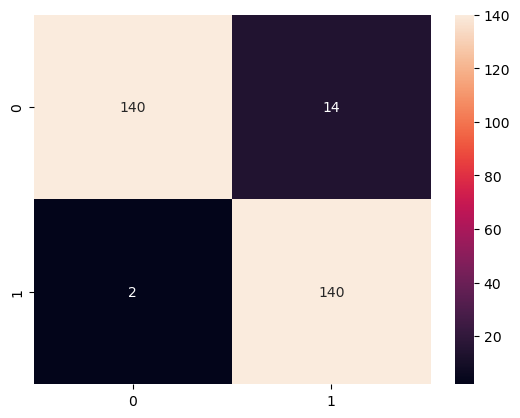

Decision Tree  : 90.88%


              precision    recall  f1-score   support

           0       0.93      0.89      0.91       149
           1       0.89      0.93      0.91       147

    accuracy                           0.91       296
   macro avg       0.91      0.91      0.91       296
weighted avg       0.91      0.91      0.91       296





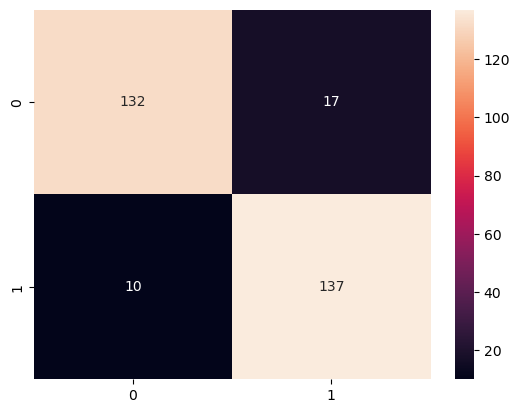

Random Forest  : 94.26%


              precision    recall  f1-score   support

           0       0.99      0.90      0.94       155
           1       0.90      0.99      0.94       141

    accuracy                           0.94       296
   macro avg       0.94      0.94      0.94       296
weighted avg       0.95      0.94      0.94       296





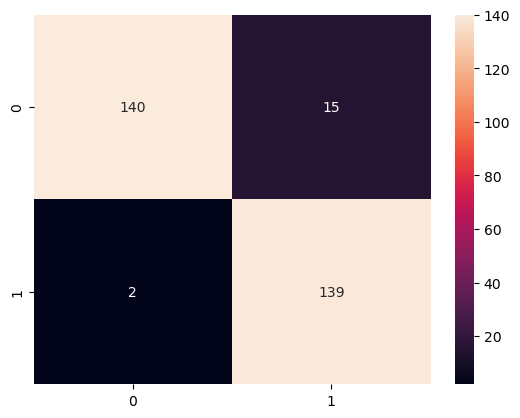

In [29]:
for name, model in models.items():
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print(name , " : {:.2f}%".format(accuracy_score(Y_pred,Y_test)*100))
    print("\n")
    print(classification_report(Y_pred,Y_test))
    print("\n")
    sns.heatmap(confusion_matrix(Y_pred,Y_test),fmt='g',annot=True)
    plt.show()

In [30]:
lg=LogisticRegression(random_state=5)

In [31]:
lg.fit(X_train,Y_train)

E:\DELL\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=5)

In [32]:
import pickle

In [33]:
# Store the logistic regression model using pickle
pickle.dump(lg, open('logistic_regression_model.pkl', 'wb'))

In [34]:
# Load the stored model
loaded_model=pickle.load(open('logistic_regression_model.pkl', 'rb'))

In [35]:
# Create a test sample
pred1 = np.array([2.08271, 0.083512, -1.348547, 0.355365, 0.364725, -0.731189, 0.064821, -0.350401, 2.022140, -0.481939, 0.187867, -2.157240, 1.843239, 1.882716, 0.203100, -0.329656, 0.194048, 0.313403, -0.421817, -0.264484, 0.114721, 0.739802, 0.018036, 0.569343, 0.332178, -0.481858, -0.019221, -0.054609, 1.0])

# Reshape the input data for prediction
pred1 = pred1.reshape(1, -1)

# Make the prediction
prediction = loaded_model.predict(pred1)

# Print the predicted class
if prediction[0] == 1:
    print('Fraud')
else:
    print('Legit')


Legit


E:\DELL\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
